<a href="https://colab.research.google.com/github/Parul077/Learning_DataScience/blob/main/regression_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv('/content/50_Startups.csv')

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
# dividing data into dependents vs independents
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [8]:
X

array([165349.2 , 162597.7 , 153441.51, 144372.41, 142107.34, 131876.9 ,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
        93863.75,  91992.39, 119943.24, 114523.61,  78013.11,  94657.16,
        91749.16,  86419.7 ,  76253.86,  78389.47,  73994.56,  67532.53,
        77044.01,  64664.71,  75328.87,  72107.6 ,  66051.52,  65605.48,
        61994.48,  61136.38,  63408.86,  55493.95,  46426.07,  46014.02,
        28663.76,  44069.95,  20229.59,  38558.51,  28754.33,  27892.92,
        23640.93,  15505.73,  22177.74,   1000.23,   1315.46,      0.  ,
          542.05,      0.  ])

In [9]:
y

array([136897.8 , 151377.59, 101145.55, 118671.85,  91391.77,  99814.71,
       147198.87, 145530.06, 148718.95, 108679.17, 110594.11,  91790.61,
       127320.38, 135495.07, 156547.42, 122616.84, 121597.55, 145077.58,
       114175.79, 153514.11, 113867.3 , 153773.43, 122782.75, 105751.03,
        99281.34, 139553.16, 144135.98, 127864.55, 182645.56, 153032.06,
       115641.28, 152701.92, 129219.61, 103057.49, 157693.92,  85047.44,
       127056.21,  51283.14,  65947.93,  82982.09, 118546.05,  84710.77,
        96189.63, 127382.3 , 154806.14, 124153.04, 115816.21, 135426.92,
        51743.15, 116983.8 ])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
len(X_train)

40

In [12]:
len(X_test)

10

In [13]:
X_test

array([ 22177.74, 114523.61, 142107.34,  55493.95,  86419.7 ,   1000.23,
        28754.33,  64664.71,  27892.92,    542.05])

In [14]:
y_test

array([154806.14, 122616.84,  91391.77, 103057.49, 153514.11, 124153.04,
       118546.05, 139553.16,  84710.77,  51743.15])

In [15]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_test

array([[-1.27713791],
       [ 0.81452998],
       [ 1.43931159],
       [-0.52251351],
       [ 0.17796609],
       [-1.75681629],
       [-1.12817573],
       [-0.31479243],
       [-1.14768698],
       [-1.76719423]])

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(X_test)

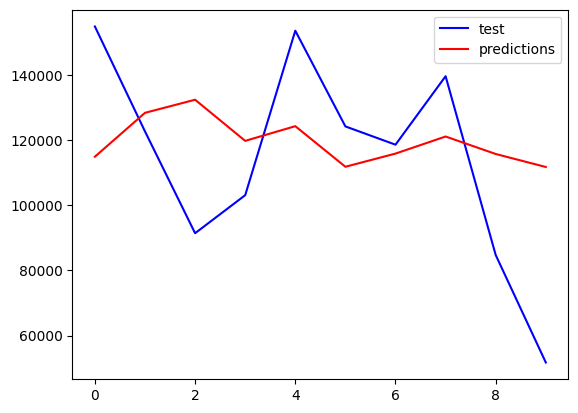

In [20]:
plt.plot(y_test, color = 'blue', label = 'test')
plt.plot(y_pred, color = 'red', label = 'predictions')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [22]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)
mse = mean_squared_error(y_test, y_pred)
print(mse)
print(np.sqrt(mse))
r2 = r2_score(y_test, y_pred)
print(r2)

25709.6725414764
949894512.4014437
30820.3587325236
-0.006197208652329422


In [23]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adjusted_r2)

-0.1319718597338706
